# Imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [61]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Helper Functions

In [62]:
sns.set()

# Load Data

In [63]:
file_path = '../data/raw/'

In [64]:
df = pd.read_csv(file_path + 'churn.csv')
df = df.drop(['RowNumber'], axis = 1)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


## Data Dimension

In [65]:
print('Number of Rows: {} \nNumber of Columns: {}'.format(df.shape[0], df.shape[1]))

Number of Rows: 10000 
Number of Columns: 13


## Check NaN Values

In [66]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Check Data Types

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


# Descriptive Analysis

## Numerical Attributes

In [68]:
numerical_attributes = df.select_dtypes(include=['int64','float64'])

t_mean = pd.DataFrame(numerical_attributes.apply( np.mean )).T
t_median = pd.DataFrame(numerical_attributes.apply( np.median )).T
t_std = pd.DataFrame(numerical_attributes.apply( np.std )).T
t_min = pd.DataFrame(numerical_attributes.apply( np.min )).T
t_max = pd.DataFrame(numerical_attributes.apply( np.max )).T
t_skew = pd.DataFrame(numerical_attributes.apply( lambda x: x.skew() )).T
t_kurtosis = pd.DataFrame(numerical_attributes.apply( lambda x: x.kurtosis() )).T

num_metrics = pd.concat( [t_min,t_max,t_mean, t_median, t_std,t_skew,t_kurtosis]).T.reset_index()
num_metrics.columns = ['attributes','min','max','mean','median','std','skew','kurtosis']
num_metrics

,attributes,min,max,mean,median,std,skew,kurtosis
0,CustomerId,15565701.000,15815690.000,15690940.569,15690738.000,71932.589,0.001,-1.196
1,CreditScore,350.000,850.000,650.529,652.000,96.648,-0.072,-0.426
2,Age,18.000,92.000,38.922,37.000,10.487,1.011,1.395
3,Tenure,0.000,10.000,5.013,5.000,2.892,0.011,-1.165
4,Balance,0.000,250898.090,76485.889,97198.540,62394.285,-0.141,-1.489
5,NumOfProducts,1.000,4.000,1.530,1.000,0.582,0.746,0.583
6,HasCrCard,0.000,1.000,0.706,1.000,0.456,-0.902,-1.187
7,IsActiveMember,0.000,1.000,0.515,1.000,0.500,-0.060,-1.997
8,EstimatedSalary,11.580,199992.480,100090.240,100193.915,57507.617,0.002,-1.182
9,Exited,0.000,1.000,0.204,0.000,0.403,1.472,0.166


In [69]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Exited']

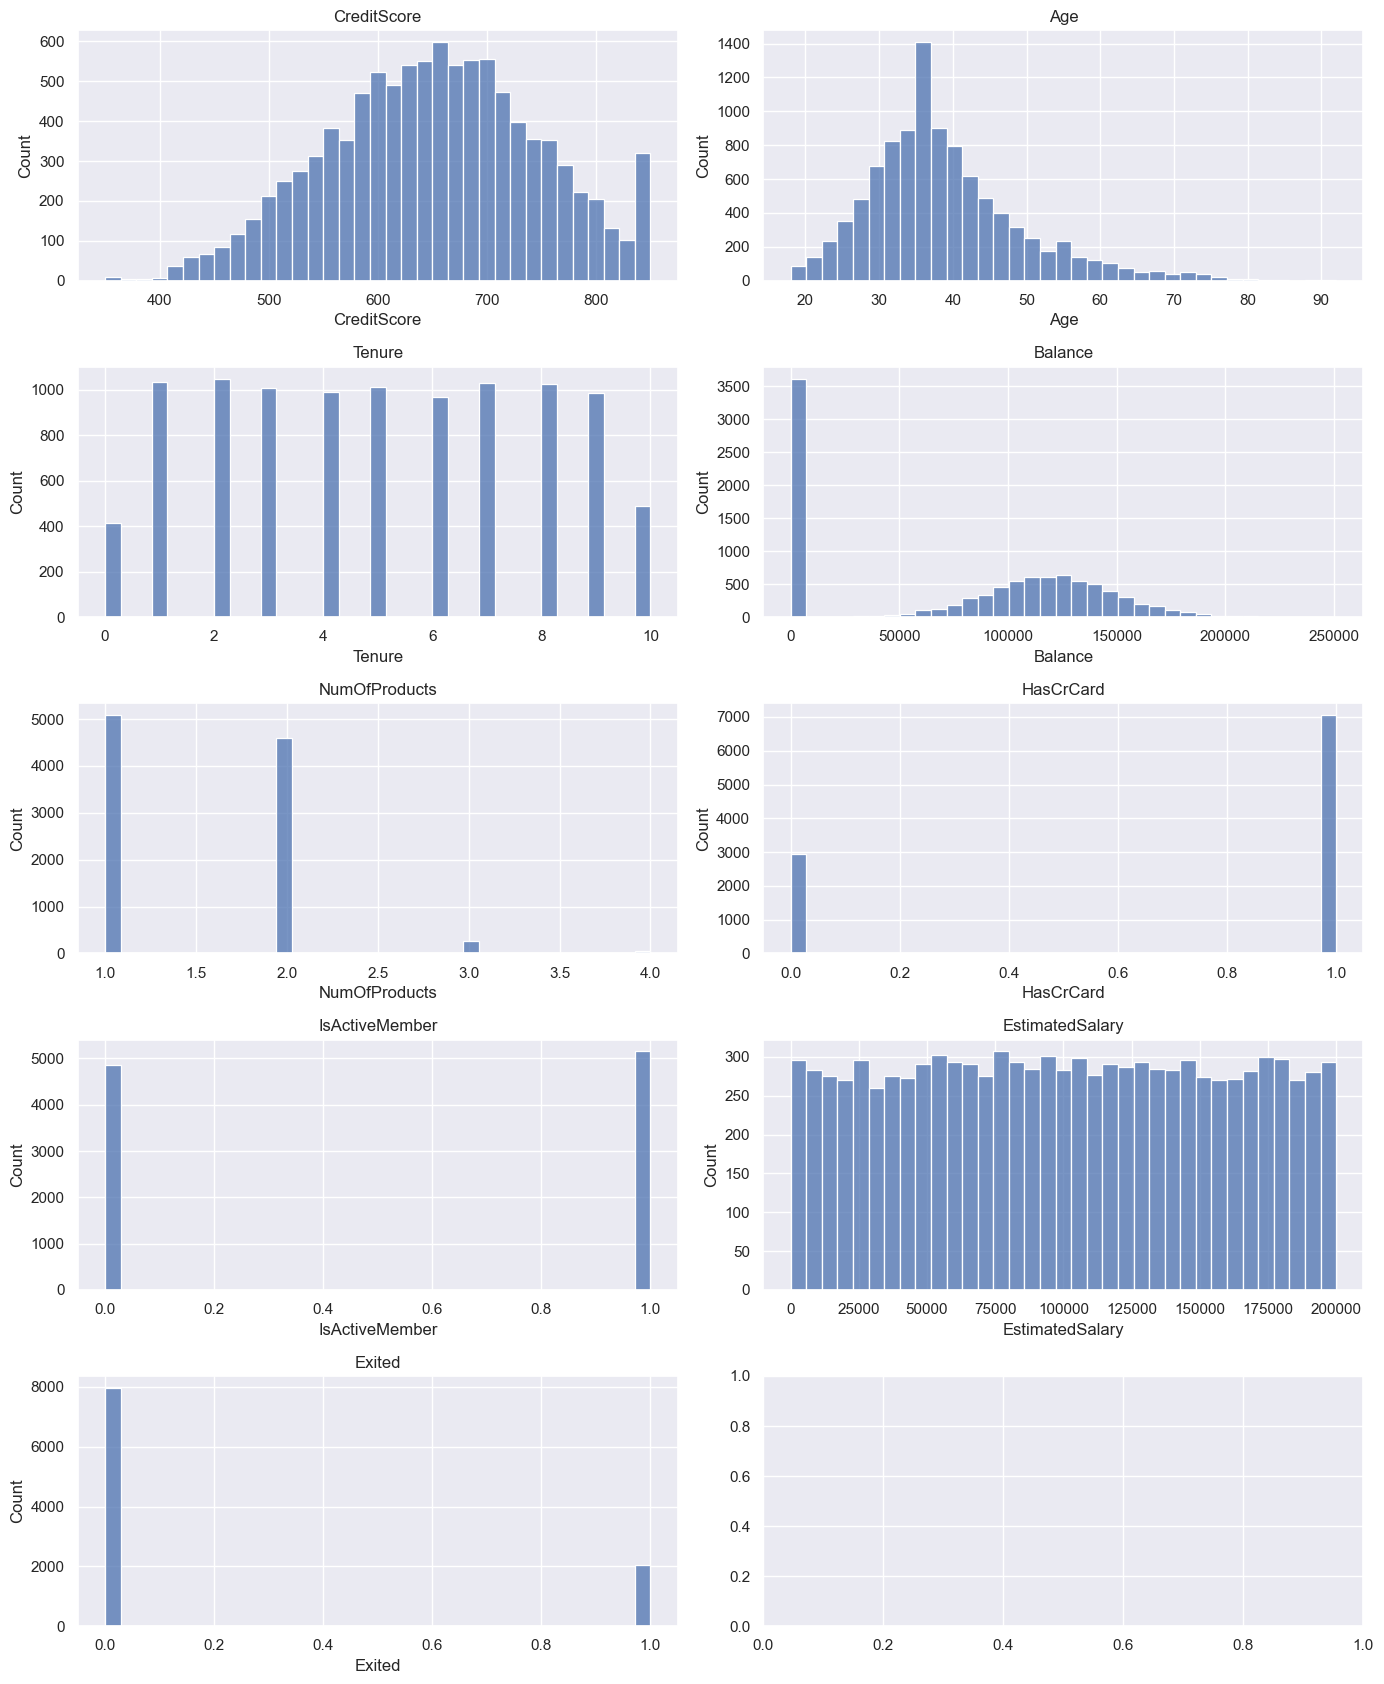

In [70]:
fig, axes = plt.subplots(int(len(num_cols)/2)+1,2, figsize=(14,17))

for i, coluna in enumerate(num_cols):
    pos_x, pos_y = divmod(i,2)
    # print(pos_x, pos_y)
    sns.histplot(data = df, x = coluna, bins = 35, ax = axes[pos_x, pos_y]);
    axes[pos_x, pos_y].set_title(coluna)

plt.tight_layout()

## Categorical Attributes

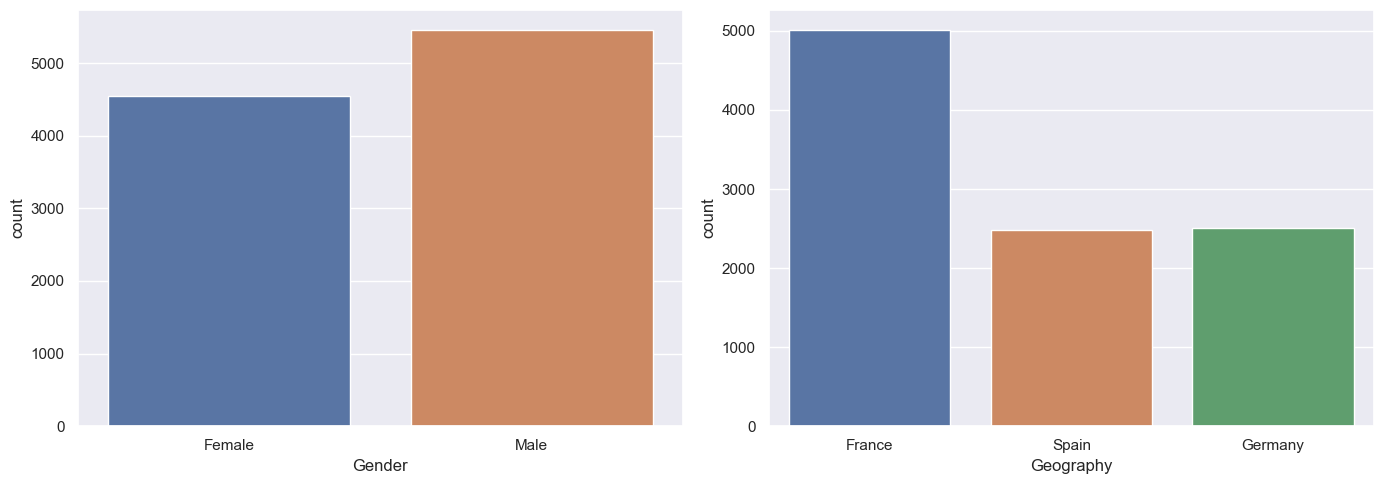

In [71]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.countplot(data = df, x = 'Gender', ax = axes[0]);
sns.countplot(data = df, x = 'Geography', ax = axes[1]);

plt.tight_layout()

# Feature Engineering

In [72]:
df1 = df.copy()
df1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [73]:
# kind of CreditScore
# < Q1(25%) = high debt
# Q1 < x < Q2(50%) = low debt
# Q2 < x < Q3(75%) = good debt
# > Q3 = excellent debt

cs_q1 = df1['CreditScore'].quantile(.25)
cs_q2 = df1['CreditScore'].quantile(.50)
cs_q3 = df1['CreditScore'].quantile(.75)

df1['qualification'] = 'high debt'
df1.loc[(df1['CreditScore'] >= cs_q1) & (df1['CreditScore'] < cs_q2),'qualification'] = 'low debt'
df1.loc[(df1['CreditScore'] >= cs_q2) & (df1['CreditScore'] < cs_q3),'qualification'] = 'good debt'
df1.loc[(df1['CreditScore'] >= cs_q3),'qualification'] = 'excellent debt'

df1.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,qualification
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1,low debt
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,low debt
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,high debt


In [74]:
# age
# < 20 = young
# 20 < x < 50 = adult
# > 50 = elder
df1['age_range'] = 'young'
df1.loc[(df1['Age'] >= 20) & (df1['Age'] < 50),'age_range'] = 'adult'
df1.loc[(df1['Age'] >= 50),'age_range'] = 'elder'

df1.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,qualification,age_range
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1,low debt,adult
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,low debt,adult
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,high debt,adult


In [75]:
# rate between amount spent by quantity of products
# Balance / NumOfProducts
df1['mean_spent_product'] = df1['Balance'] / df1['NumOfProducts']
df1.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,qualification,age_range,mean_spent_product
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1,low debt,adult,0.000
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,low debt,adult,83807.860
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,high debt,adult,53220.267


In [76]:
# verify if the client has sufficient amount to pay
# Balance / EstimatedSalary
df1['proportion_debt'] = df1['Balance'] / df1['EstimatedSalary']
df1.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,qualification,age_range,mean_spent_product,proportion_debt
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1,low debt,adult,0.000,0.000
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,low debt,adult,83807.860,0.745
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,high debt,adult,53220.267,1.401


# Data Filtering

# EDA

In [77]:
df2 = df1.copy()

## Hypothesis

- H1. Good and Excellent Debt are more concentrated in the ADULT range than others
- H2. High and Low Debt are concentrated under 30-year
- H3. High Tenure is concentrated in Elder range
- H4. Under 30-year has more CreditCard than others
- H5. Churn is concentrated under 40-year
- H6. Churn is concentrated less than 3 Tenure
- H7. Churn is concentrated in Low Debt than others
- H8. The Balance increase long the Tenure
- H9. Churn is concentrated in Active customers
- H10. Mean Spent Amount above 25k has more Churn


## Univariate Analysis

In [78]:
num_cols = list(df2.select_dtypes(include=['int64','float64']).columns)
num_cols.remove('CustomerId')

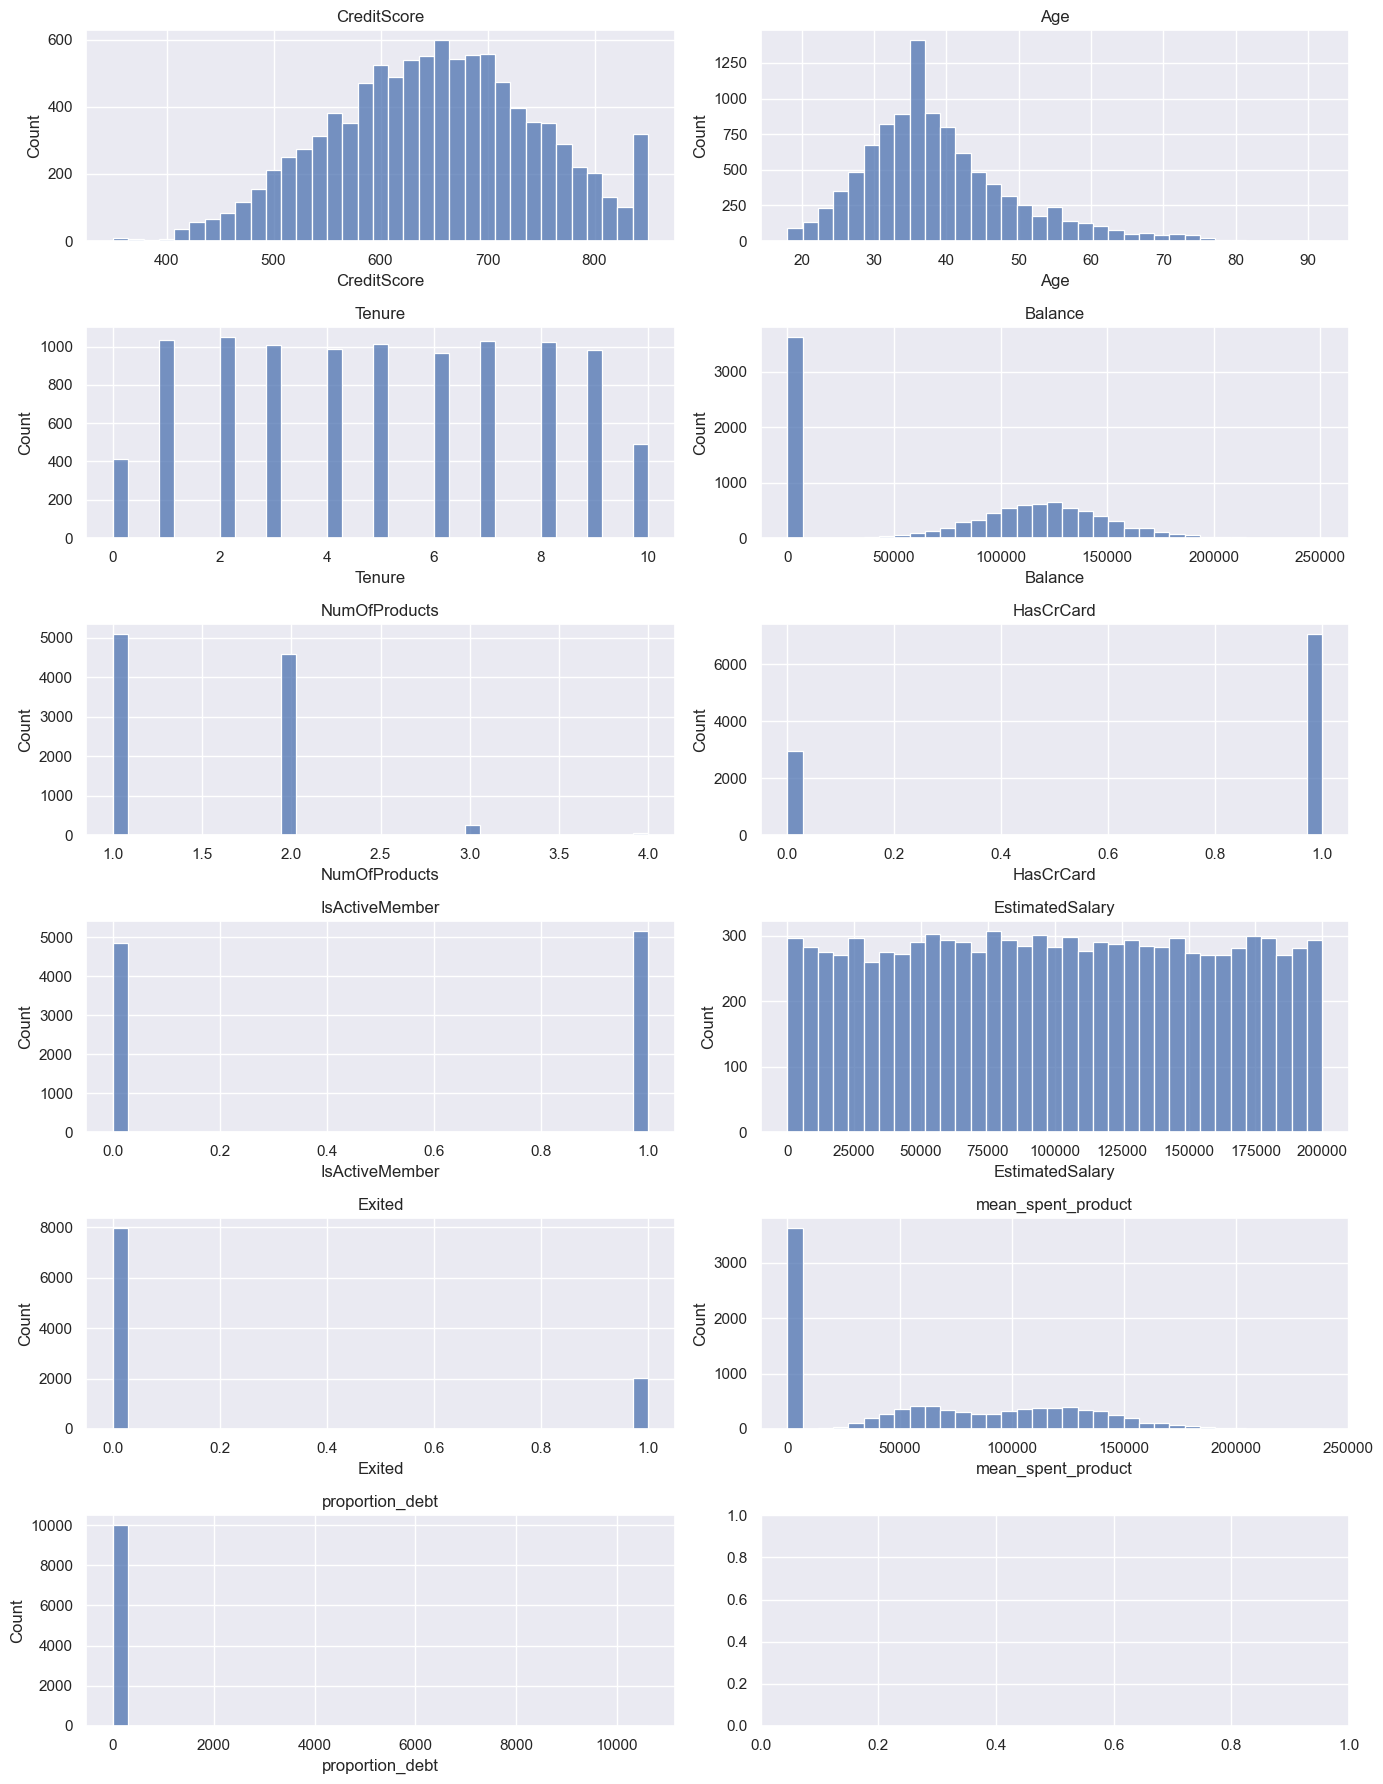

In [79]:
qty_rows = int(len(num_cols)/2)+1
fig, axes = plt.subplots(qty_rows,2, figsize=(14,qty_rows*3))

for i, coluna in enumerate(num_cols):
    pos_x, pos_y = divmod(i,2)
    # print(pos_x, pos_y)
    sns.histplot(data = df2, x = coluna, bins = 35, ax = axes[pos_x, pos_y]);
    axes[pos_x, pos_y].set_title(coluna)

plt.tight_layout()

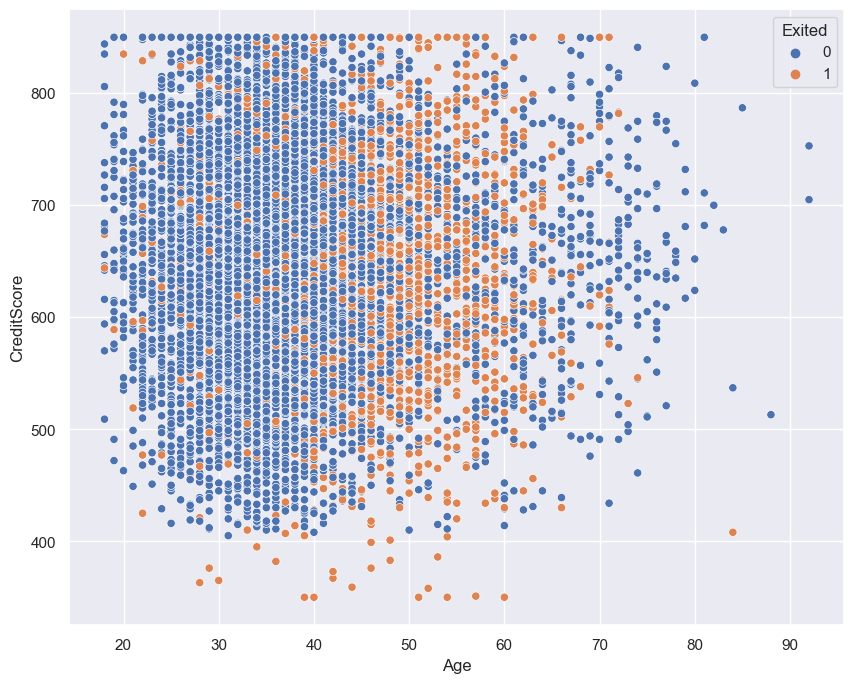

In [85]:
fig, axes = plt.subplots(1,1,figsize=(10,8))


sns.scatterplot(data = df2, x = 'Age', y = 'CreditScore', hue = 'Exited',ax = axes);

## Bivariate Analysis

### - H1. Good and Excellent Debt are more concentrated in the ADULT range than others

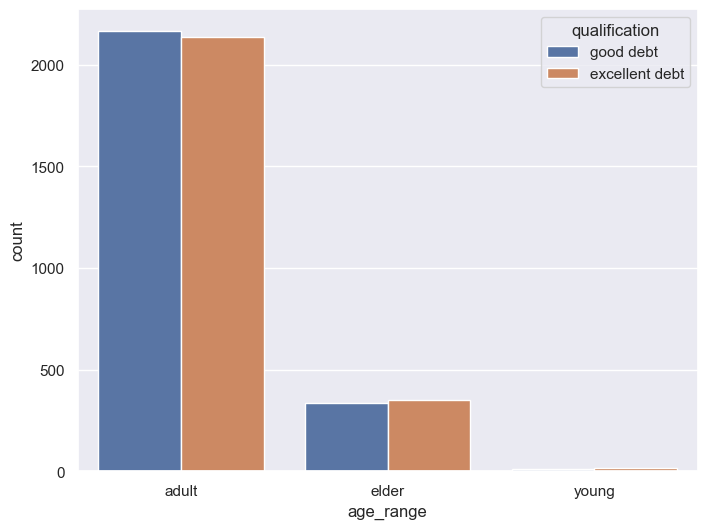

In [82]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

aux = df2.loc[df2['qualification'].isin(['good debt','excellent debt'])]
sns.countplot(data = aux, x = 'age_range', hue = 'qualification', ax = axes);

### TRUE: Adult is responsible for the concentration of almot all Good/Excellent Debt

### - H2. High and Low Debt are concentrated under 30-year

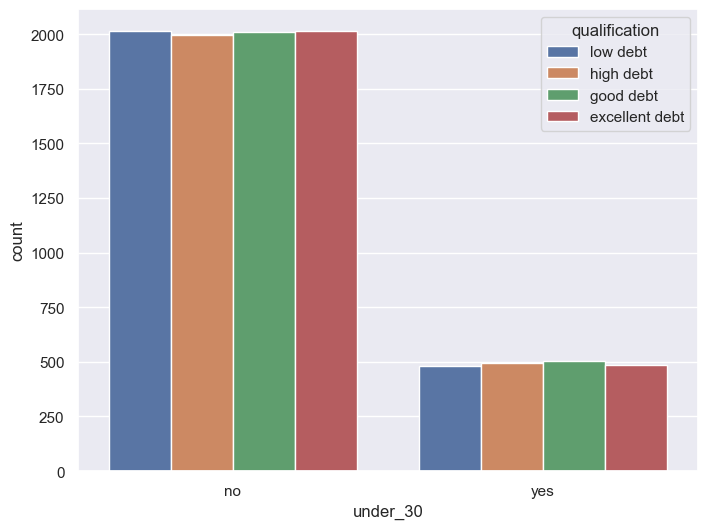

In [87]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

aux = df2.copy()
aux['under_30'] = 'yes'
aux.loc[aux['Age'] > 30, 'under_30'] = 'no'
sns.countplot(data = aux, x = 'under_30', hue = 'qualification', ax = axes);

### TRUE: Almost every qualification is concentrated under 30

### - H3. High Tenure is concentrated in Elder range

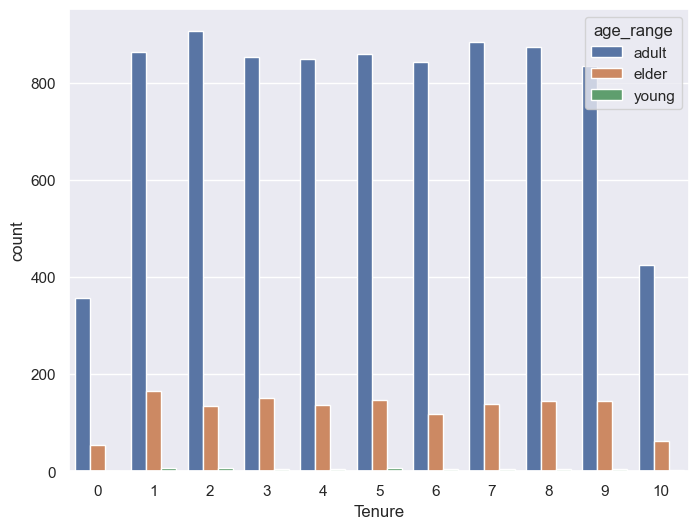

In [86]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

sns.countplot(data = df2, x = 'Tenure', hue = 'age_range', ax = axes);

### FALSE: There no concentration in evidence for Elder along the Tenure-axis

### - H4. Under 30-year has more CreditCard than others

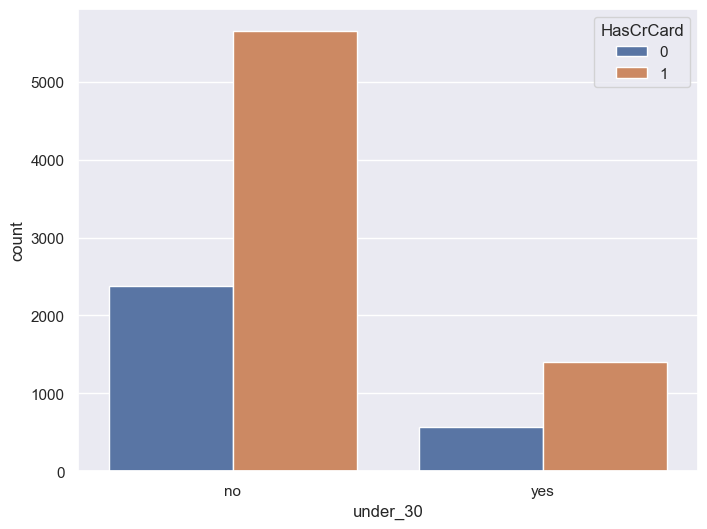

In [88]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

aux = df2.copy()
aux['under_30'] = 'yes'
aux.loc[aux['Age'] > 30, 'under_30'] = 'no'
sns.countplot(data = aux, x = 'under_30', hue = 'HasCrCard', ax = axes);

### FALSE: Above 30 has more Credit Card than under 30

### - H5. Churn is concentrated under 40-year

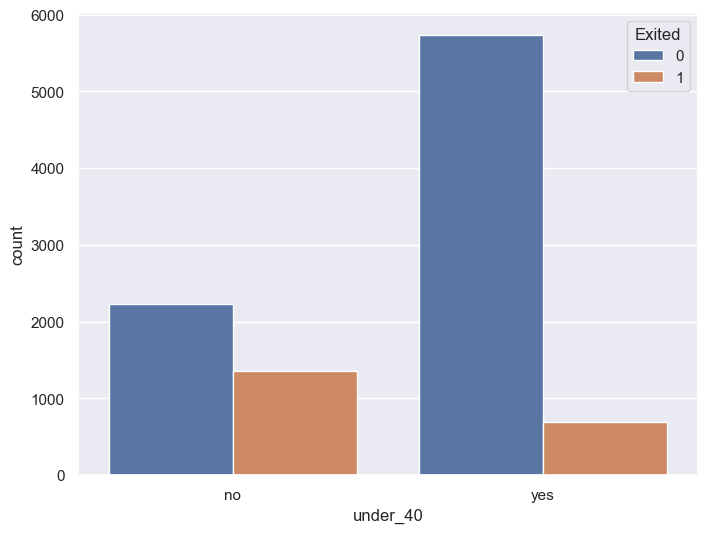

In [89]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

aux = df2.copy()
aux['under_40'] = 'yes'
aux.loc[aux['Age'] > 40, 'under_40'] = 'no'
sns.countplot(data = aux, x = 'under_40', hue = 'Exited', ax = axes);

### FALSE: Above 40 has more CHURN than under 40

### - H6. Churn is concentrated less than 3 Tenure

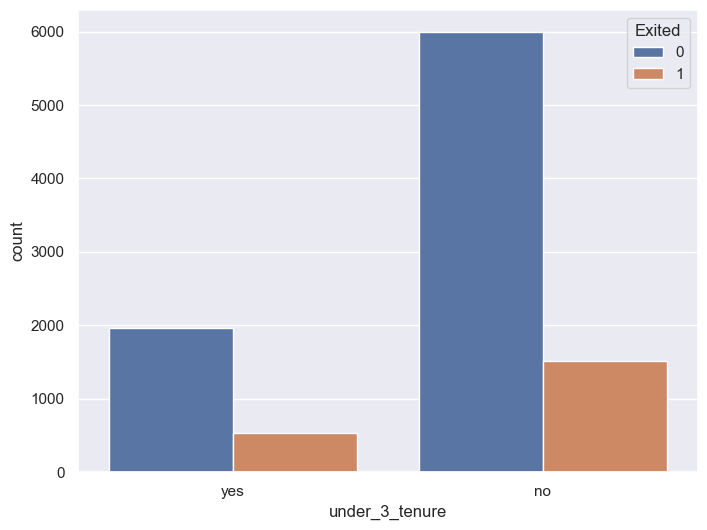

In [91]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

aux = df2.copy()
aux['under_3_tenure'] = 'yes'
aux.loc[aux['Tenure'] >= 3, 'under_3_tenure'] = 'no'
sns.countplot(data = aux, x = 'under_3_tenure', hue = 'Exited', ax = axes);

### FALSE: Tenure above 3 has more Churn than below 3

### - H7. Churn is concentrated in Low Debt than others

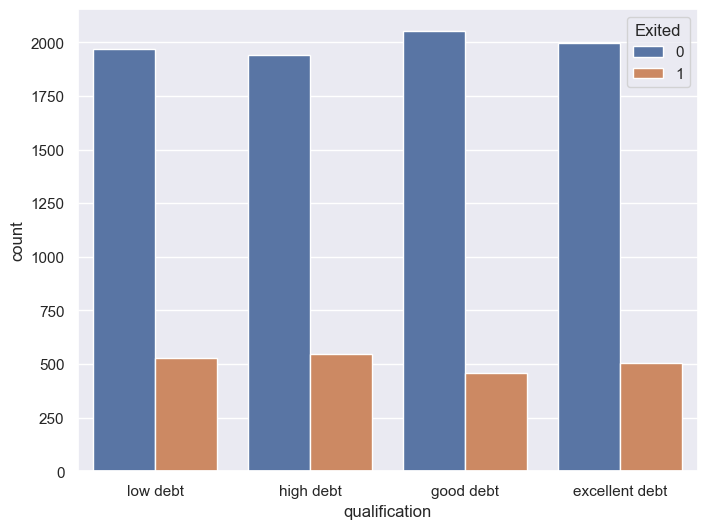

In [92]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

sns.countplot(data = df2, x = 'qualification', hue = 'Exited', ax = axes);

### FALSE: HIGH EBT has more Churn than LOW DEBT

### - H8. The Balance increase long the Tenure

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

aux = df2.copy()
aux['under_30'] = 'yes'
aux.loc[aux['Age'] > 30, 'under_30'] = 'no'
sns.countplot(data = aux, x = 'under_30', hue = 'qualification', ax = axes);

### - H9. Churn is concentrated in Active customers

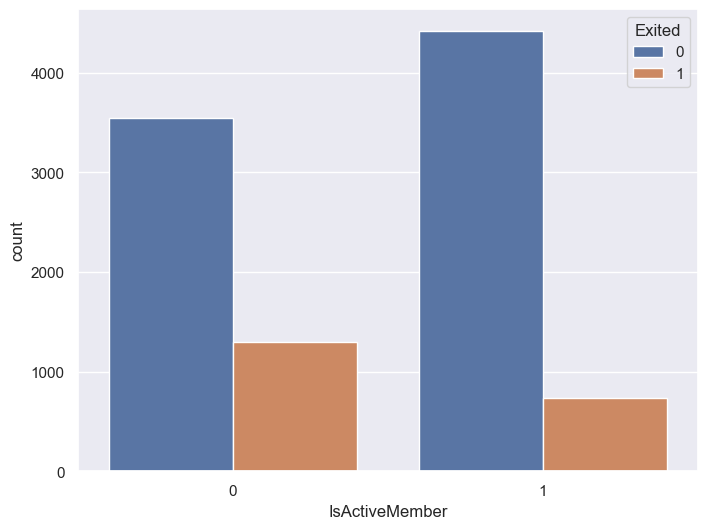

In [94]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

sns.countplot(data = df2, x = 'IsActiveMember', hue = 'Exited', ax = axes);

### FALSE: Churn is concentrated in non-Active Members

### - H10. Mean Spent Amount above 25k has more Churn

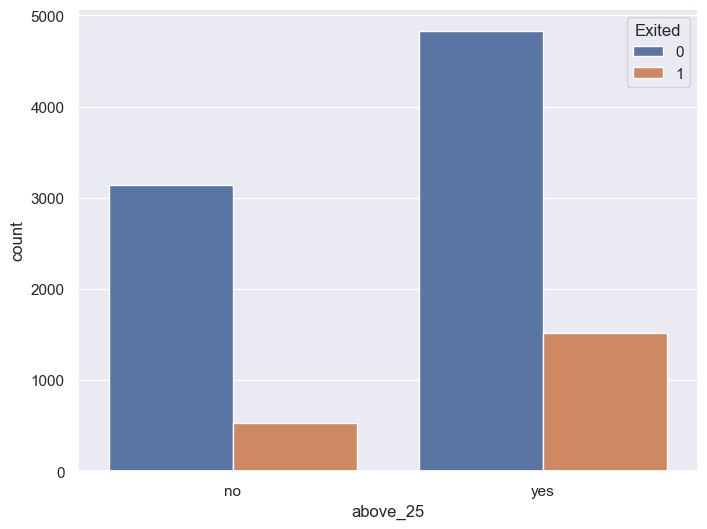

In [97]:
fig, axes = plt.subplots(1,1,figsize=(8,6))

aux = df2.copy()
aux['above_25'] = 'yes'
aux.loc[aux['mean_spent_product'] < 25000, 'above_25'] = 'no'
sns.countplot(data = aux, x = 'above_25', hue = 'Exited', ax = axes);

### TRUE: The Mean Spent above $25k has more Churn values than values above 25k

## Multivariate Analysis

C:\Users\u337356\AppData\Local\Temp\ipykernel_12284\536685591.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df2.corr(method = 'pearson')


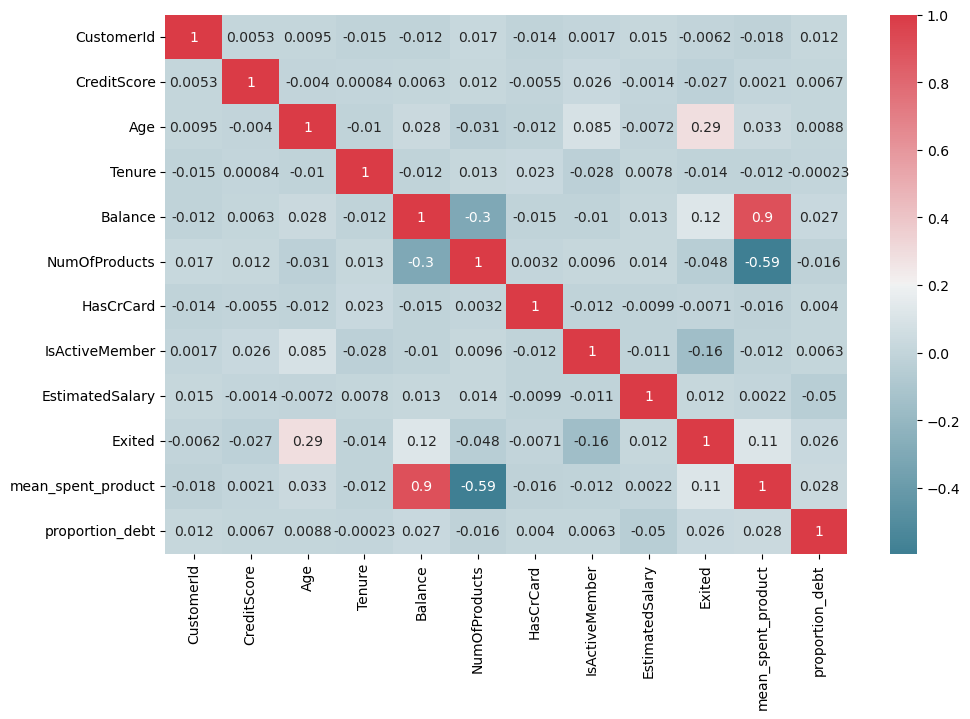

In [46]:
correlations = df2.corr(method = 'pearson')

fig, axes = plt.subplots(1,1,figsize=(11,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlations, ax = axes, cmap=cmap, annot = True);